In [32]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import model_from_json
from matplotlib import gridspec
from PIL import Image, ImageOps

mnist = tf.keras.datasets.mnist #28x28 images of hand written digits 0-9

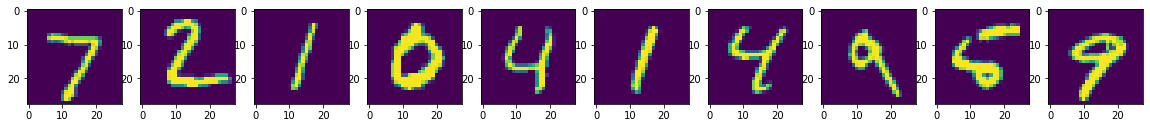

In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


plt.figure(1, figsize=(20,3)) # Start displaying images
for i in range(10):
    plt.subplot(1,10,i+1)
    imagex = np.squeeze(x_test[i])
    plt.imshow(imagex)

In [34]:
# Shapes of data start displaying
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


In [35]:
print('Train', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test', x_test.min(), x_test.max(), x_test.mean(), x_test.std())

Train 0 255 33.318421449829934 78.56748998339798
Test 0 255 33.791224489795916 79.17246322228644


In [36]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [37]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [38]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
print('Train min=%.1f, max=%.1f' % (x_train.min(), x_train.max()))
print('Test min=%.1f, max=%.1f' % (x_train.min(), x_train.max()))

Train min=0.0, max=255.0
Test min=0.0, max=255.0


In [40]:
iterator_test = datagen.flow(x_train, y_train, 64) # 64 images per epoch
iterator_train = datagen.flow(x_train, y_train, 64)

In [41]:
x_batch, y_batch = iterator_train.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (x_batch.shape, y_batch.min(), x_batch.max()))

Batch shape=(64, 28, 28, 1), min=0.000, max=1.000


In [50]:
# BUILD MODEL
model = Sequential()

In [51]:
# Input layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
                 
# Output layer 
model.add(Dense(10, activation='softmax'))

In [52]:
# Adam optimizer with categorical crossentropy
# Same but with Stochastic gradient descent optimizer
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [53]:
# Set the Epochs = 5 , pass training set through network 5 times
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 59s 983us/sample - loss: 0.3340 - acc: 0.9419
Epoch 2/5
60000/60000 [==============================] - 59s 989us/sample - loss: 0.0693 - acc: 0.9795
Epoch 3/5
60000/60000 [==============================] - 58s 969us/sample - loss: 0.0541 - acc: 0.9840
Epoch 4/5
60000/60000 [==============================] - 59s 991us/sample - loss: 0.0463 - acc: 0.9857
Epoch 5/5
60000/60000 [==============================] - 59s 985us/sample - loss: 0.0398 - acc: 0.9881


In [54]:
# MODEL SUMMARY
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [55]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 4s 431us/sample - loss: 0.0600 - acc: 0.9845
0.06000136265574838 0.9845


In [56]:
# Make a Prediction based on the model & save model to json to be added to WebApp
model_json = model.to_json()
with open("DigitRec.json", "w") as json_file:json_file.write(model_json)

# Save weights
model.save_weights("DigitRec.h5")

In [61]:
json_model = open('DigitRec.json','r')
load_model_json = json_model.read()
json_model.close()
loaded_model = model_from_json(load_model_json)

loaded_model.load_weights('DigitRec.h5')

In [62]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

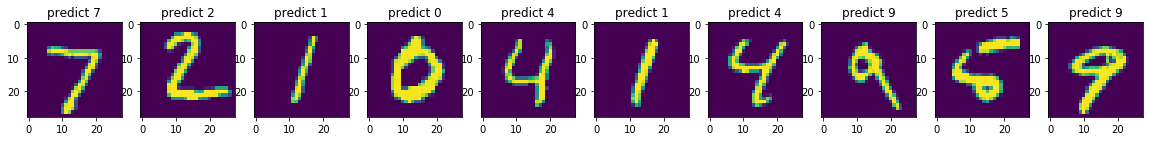

In [63]:
# Visualise data and predict test images against model
loaded_predications = loaded_model.predict(x_test)

plt.figure(1, figsize=(20,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title("predict "+str(np.argmax(loaded_predications[i])))
    imagex = np.squeeze(x_test[i])
    plt.imshow(imagex)

<PIL.Image.Image image mode=L size=819x460 at 0x1E90260D0F0>


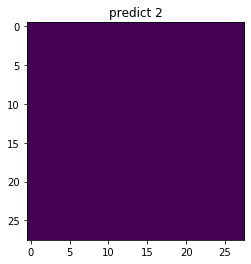

In [60]:
# Read in image from file system and predict its value
original_image = Image.open('drawing.png').convert("L")
print(original_image)
size = (28,28)
original_image = ImageOps.fit(original_image, size, Image.ANTIALIAS)

img_array = np.array(original_image).reshape(1,28,28,1)
prediction1 = loaded_model.predict(img_array)

plt.title("predict "+str(np.argmax(prediction1)))
plt.imshow(original_image)